# Imports

In [1]:
import numpy as np
import os
import sys
import pickle
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from pycirclize import Circos
from pycirclize.parser import Matrix

import networkx as nx

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import fixedDensity as fd
import chordPlot as cp

# Set Directory Paths

In [3]:
# Directory path to load formatted Layer Data
%store -r layer_dataDir

# Directory path to save Calcualted Analysis Data
%store -r layer_CalData

# Directory path to save Figures
%store -r layer_Fig

# Loading

## Loading Covariance Matrices

In [4]:
# cov_SMI32_dict
with open(os.path.join(layer_CalData, 'cov_SMI32_dict.pkl'), 'rb') as f:
    cov_SMI32_dict = pickle.load(f)
f.close()

# cov_SMI32_dict_w
with open(os.path.join(layer_CalData, 'cov_SMI32_dict_w.pkl'), 'rb') as f:
    cov_SMI32_dict_w = pickle.load(f)
f.close()

## Loading Log %AO Values

In [5]:
# NeuN_HC
with open(os.path.join(layer_dataDir, 'NeuN_HC.pkl'), 'rb') as f:
    NeuN_HC = pickle.load(f)
f.close()

# NeuN_TAU
with open(os.path.join(layer_dataDir, 'NeuN_TAU.pkl'), 'rb') as f:
    NeuN_TAU = pickle.load(f)
f.close()

# NeuN_TDP
with open(os.path.join(layer_dataDir, 'NeuN_TDP.pkl'), 'rb') as f:
    NeuN_TDP = pickle.load(f)
f.close()

# SMI32_HC
with open(os.path.join(layer_dataDir, 'SMI32_HC.pkl'), 'rb') as f:
    SMI32_HC = pickle.load(f)
f.close()

# SMI32_TAU
with open(os.path.join(layer_dataDir, 'SMI32_TAU.pkl'), 'rb') as f:
    SMI32_TAU = pickle.load(f)
f.close()

# SMI32_TDP
with open(os.path.join(layer_dataDir, 'SMI32_TDP.pkl'), 'rb') as f:
    SMI32_TDP = pickle.load(f)
f.close()

## Loading Layer Neuron Labels (SMI32)

In [6]:
SMI32_Labels = ['L23_1(Cingulate)', 'L23_2(Cingulate)', 'L23_3d(Paracingulate)', 'L23_3v(Paracingulate)', 'L23_4(Rectus)', 'L23_5(Middle Frontal)', 
               'L56_1(Cingulate)', 'L56_2(Cingulate)', 'L56_3d(Paracingulate)', 'L56_3v(Paracingulate)', 'L56_4(Rectus)', 'L56_5(Middle Frontal)']

# Draw Graph Networks (SMI32)

## Define Variables

### Set fixed density value 

In [7]:
fd_val = 10

### Label Order

In [8]:
order = ['L23_5(Middle Frontal)',
         'L23_4(Rectus)',
         'L23_3v(Paracingulate)', 
         'L23_3d(Paracingulate)',
         'L23_2(Cingulate)',
         'L23_1(Cingulate)',
         'L56_1(Cingulate)',
         'L56_2(Cingulate)',
         'L56_3d(Paracingulate)',
         'L56_3v(Paracingulate)', 
         'L56_4(Rectus)',
         'L56_5(Middle Frontal)']

### Dataset to Use

In [9]:
# Variable setting
neuron_type = "SMI32"
val_type = 'W-Score'
cov_dict = cov_SMI32_dict_w
data_label = SMI32_Labels

In [10]:
# Set Node Sizes based on Log %AO values
HC_exp = SMI32_HC.copy()
TAU_exp = SMI32_TAU.copy()
TDP_exp = SMI32_TDP.copy()

# Get min/max %AO of LBD
minVal = np.nanmin(np.concatenate((HC_exp.flatten(), TAU_exp.flatten(), TDP_exp.flatten())))
maxVal = np.nanmax(np.concatenate((HC_exp.flatten(), TAU_exp.flatten(), TDP_exp.flatten())) - minVal + 0.0015, axis=0)

scale = 700

# Apply a transformation to create a more dramatic difference in node sizes
def transform_values(values, min_val, max_val, scale):
    # Normalize the values
    normalized = (values - min_val) / max_val
    # Apply an exponential transformation
    transformed = np.exp(normalized) - 1  # subtracting 1 to bring the minimum back to 0
    # Scale the transformed values
    return scale * transformed

# Size of Nodes
markerVecHC = np.nanmean(HC_exp, axis=0)
markerVecHC = transform_values(markerVecHC, minVal, maxVal, scale)

markerVecTAU = np.nanmean(TAU_exp, axis=0)
markerVecTAU = transform_values(markerVecTAU, minVal, maxVal, scale)

markerVecTDP = np.nanmean(TDP_exp, axis=0)
markerVecTDP = transform_values(markerVecTDP, minVal, maxVal, scale)

## HC > TAU

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

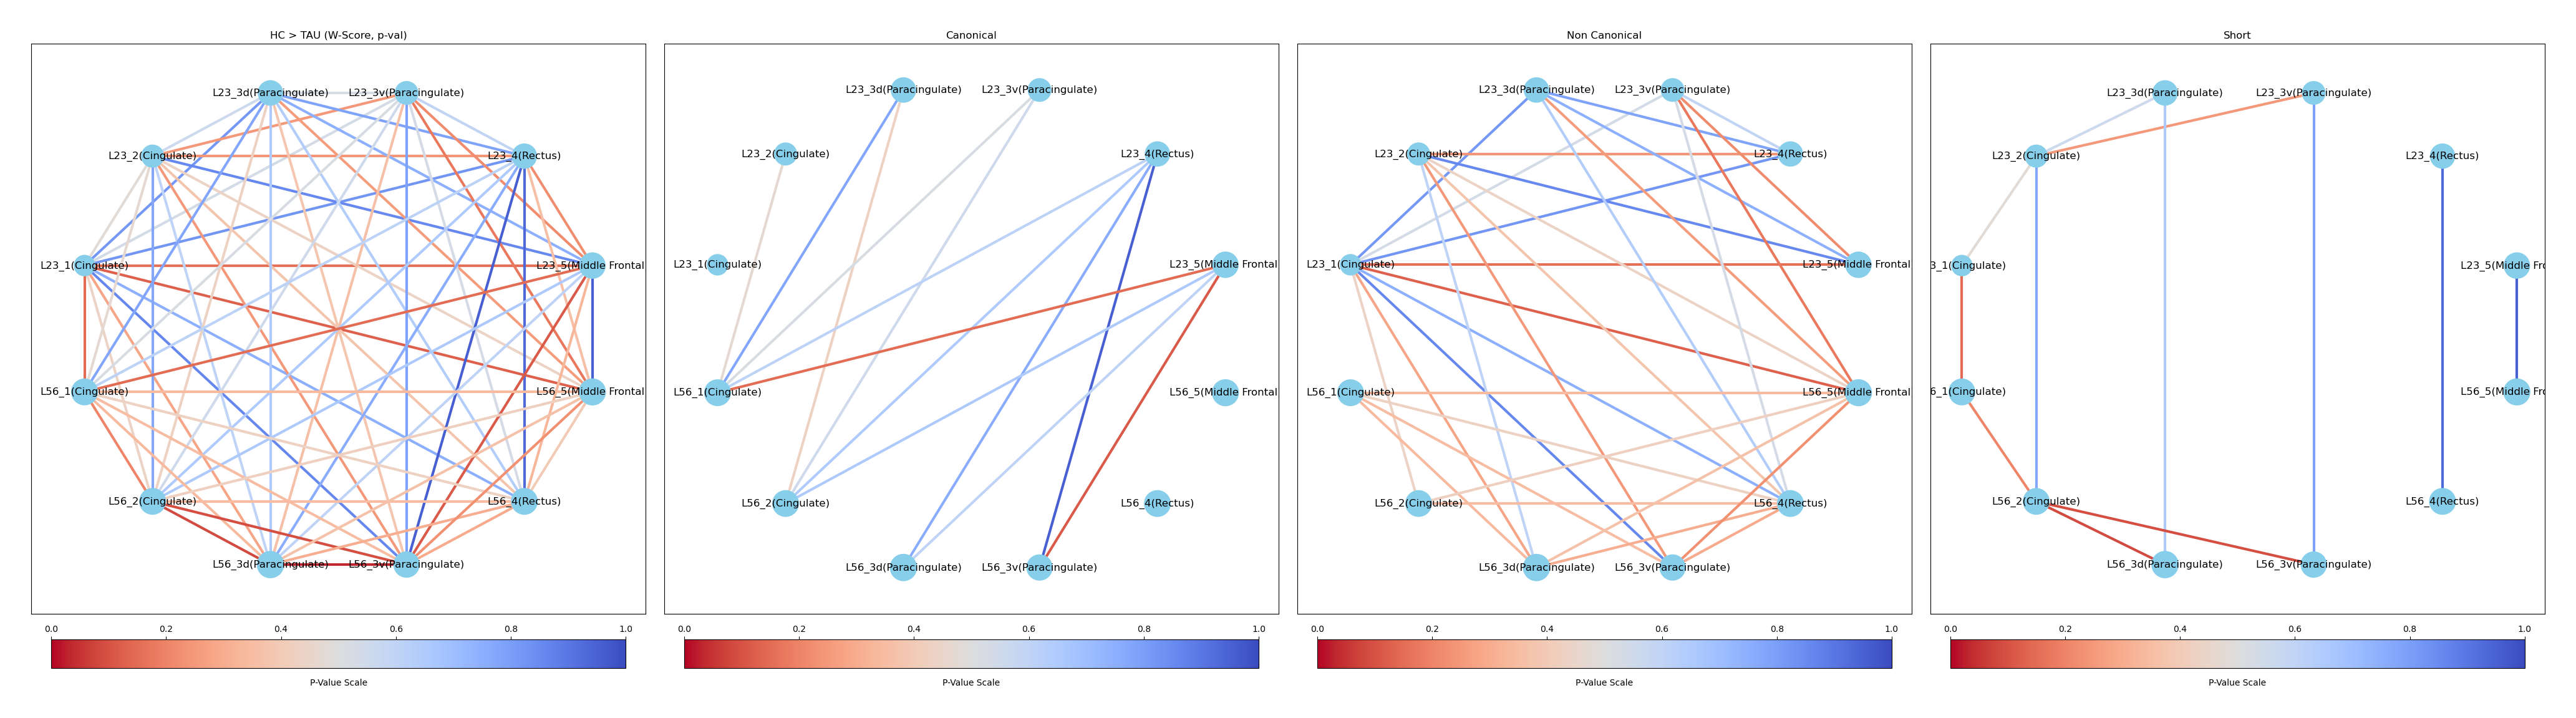

In [11]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TAU_lt_HC_raw'], data_label, f'HC > TAU ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TAU_lt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TAU_lt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TAU_lt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecHC)

plt.savefig(layer_Fig + f'/SMI32_HC > TAU ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()



## TAU > HC

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

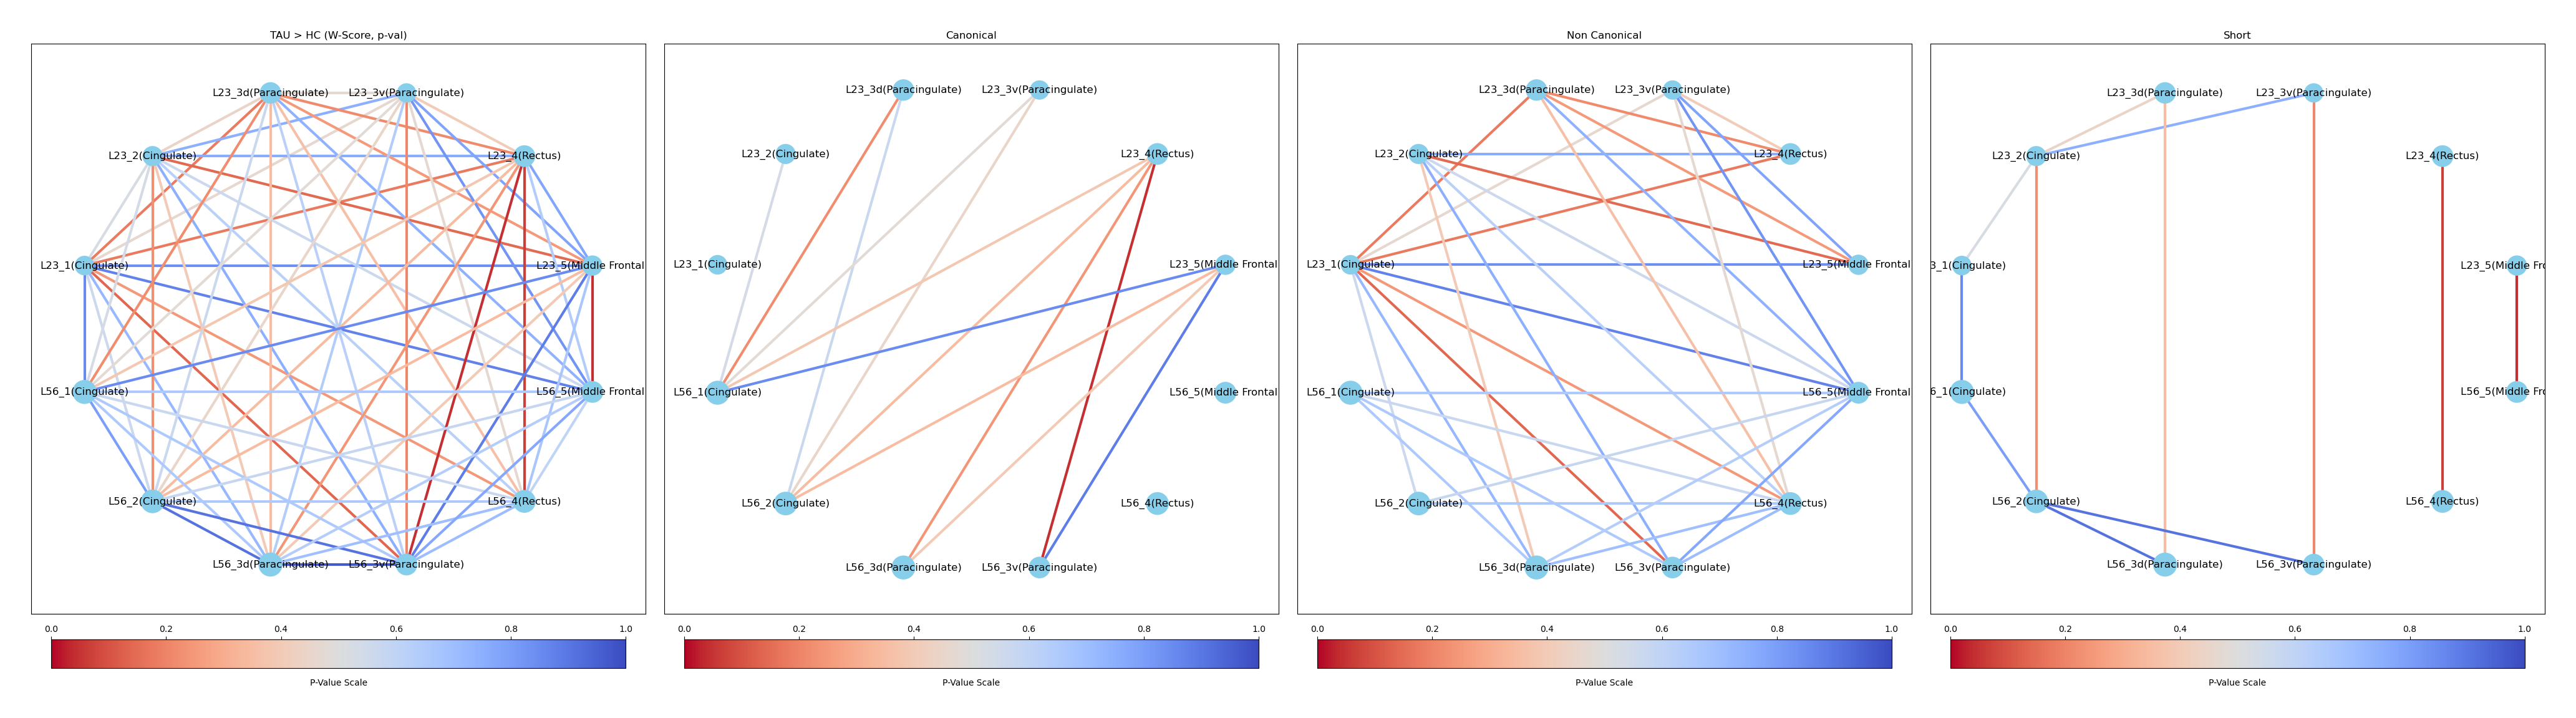

In [12]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TAU_gt_HC_raw'], data_label, f'TAU > HC ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTAU)

plt.savefig(layer_Fig + f'/SMI32_TAU > HC ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()

## HC > TDP

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

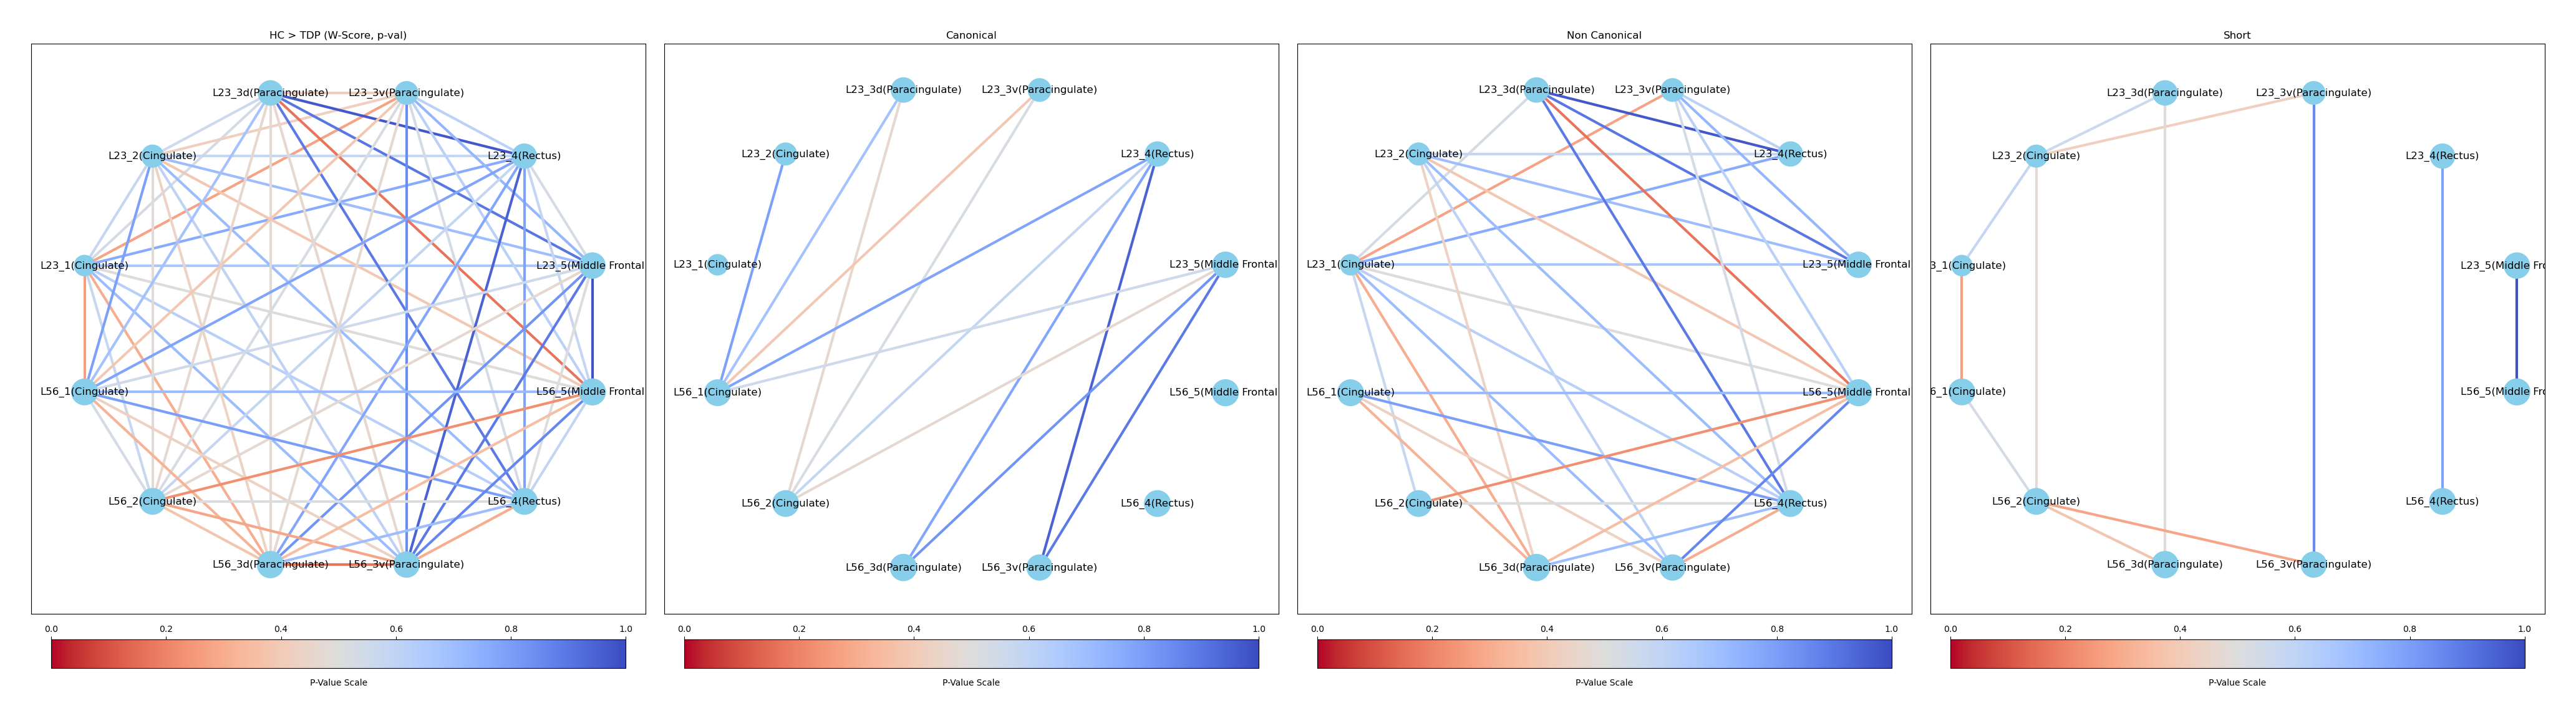

In [13]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TDP_lt_HC_raw'], data_label, f'HC > TDP ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TDP_lt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TDP_lt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TDP_lt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecHC)

plt.savefig(layer_Fig + f'/SMI32_HC > TDP ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()

## TDP > HC

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

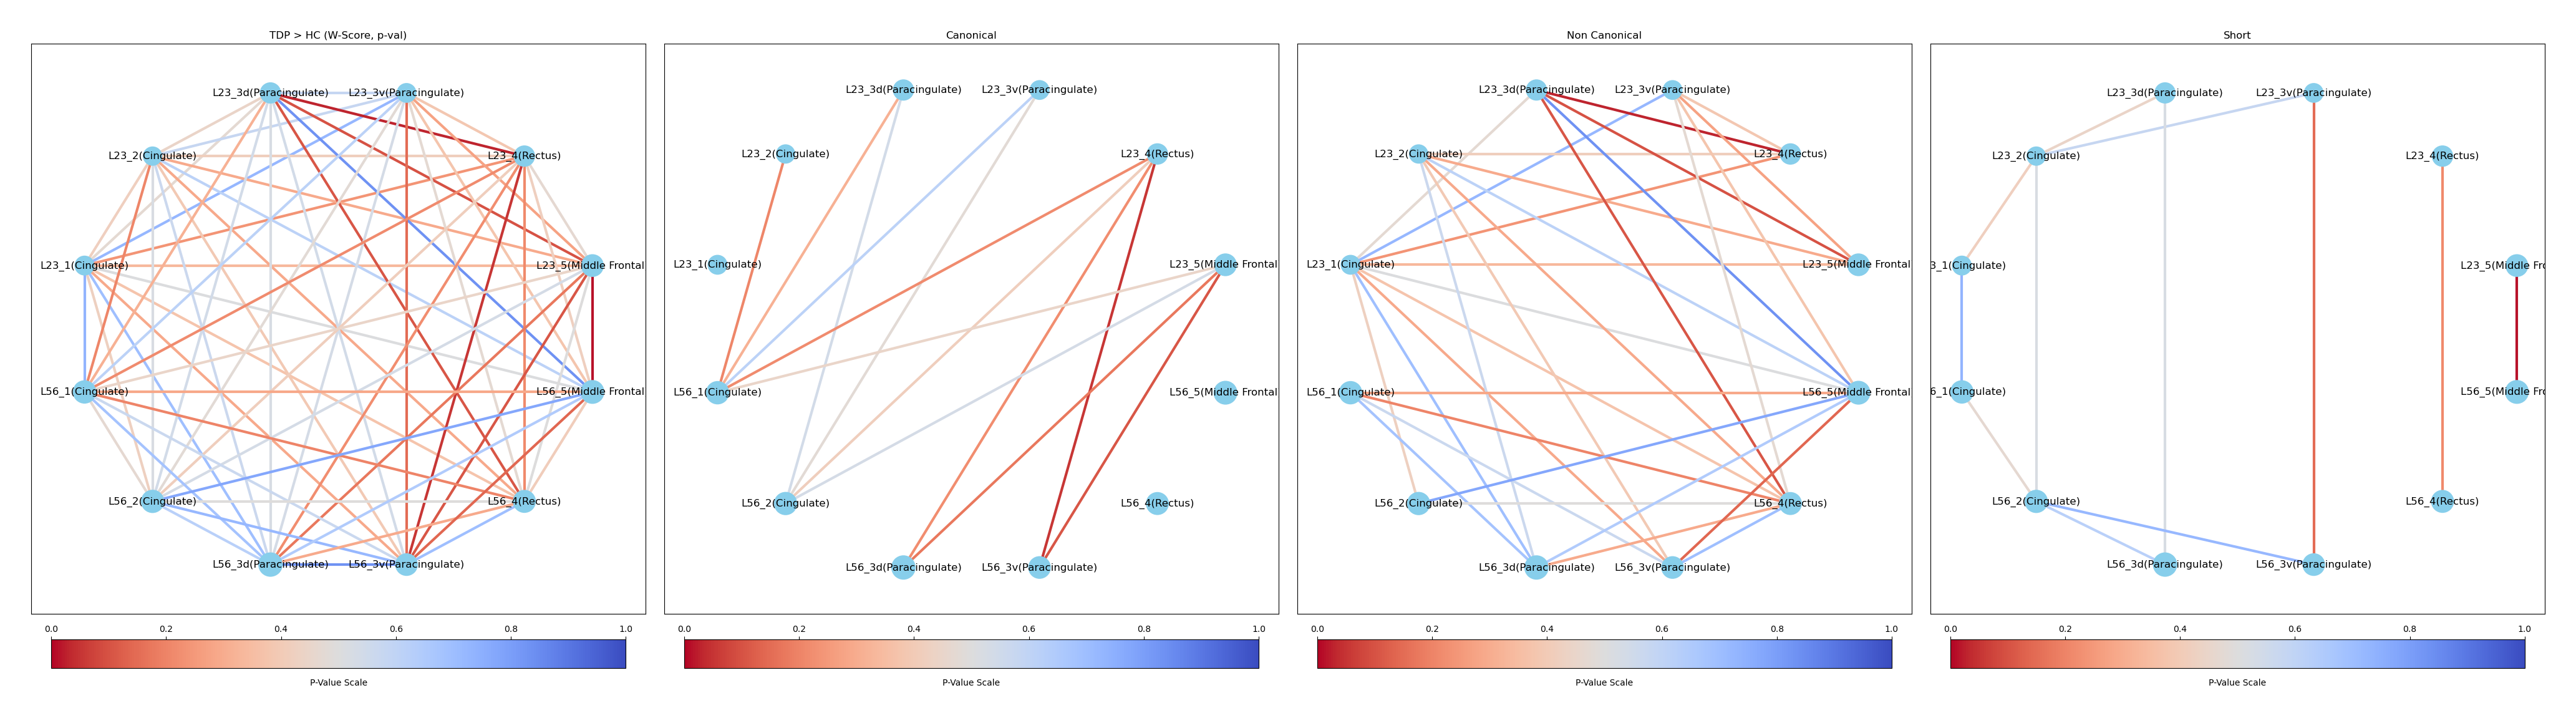

In [14]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TDP_gt_HC_raw'], data_label, f'TDP > HC ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTDP)

plt.savefig(layer_Fig + f'/SMI32_TDP > HC ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()

## TAU > TDP

In [15]:
pd.DataFrame(cov_dict['TAU_gt_TDP_raw'])

0         1         2         3         4         5         6   \
0        NaN  0.599442  0.177793  0.275824  0.378251  0.949985  0.704413   
1   0.599442       NaN  0.493955  0.699264  0.840237  0.238461  0.807334   
2   0.177793  0.493955       NaN  0.399654  0.846007  0.744415  0.357372   
3   0.275824  0.699264  0.399654       NaN  0.499732  0.914569  0.385359   
4   0.378251  0.840237  0.846007  0.499732       NaN  0.851472  0.675506   
5   0.949985  0.238461  0.744415  0.914569  0.851472       NaN  0.911051   
6   0.704413  0.807334  0.357372  0.385359  0.675506  0.911051       NaN   
7   0.639782  0.192213  0.533857  0.466512  0.406372  0.282026  0.837601   
8   0.549862  0.327799  0.312731  0.613372  0.499820  0.783793  0.490907   
9   0.265785  0.820624  0.585450  0.513269  0.353141  0.991580  0.603319   
10  0.335864  0.812331  0.804697  0.491233  0.191647  0.706946  0.847980   
11  0.909227  0.457215  0.370363  0.898724  0.749100  0.642070  0.861765   

          7         8         9         10        11  
0   0.639782  0.549862  0.265785  0.335864  0.909227  
1   0.192213  0.327799  0.820624  0.812331  0.457215  
2   0.533857  0.312731  0.585450  0.804697  0.370363  
3   0.466512  0.613372  0.513269  0.491233  0.898724  
4   0.406372  0.499820  0.353141  0.191647  0.749100  
5   0.282026  0.783793  0.991580  0.706946  0.642070  
6   0.837601  0.490907  0.603319  0.847980  0.861765  
7        NaN  0.878856  0.805188  0.678302  0.278715  
8   0.878856       NaN  0.846761  0.867231  0.496774  
9   0.805188  0.846761       NaN  0.544689  0.961983  
10  0.678302  0.867231  0.544689       NaN  0.711301  
11  0.278715  0.496774  0.961983  0.711301       NaN

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

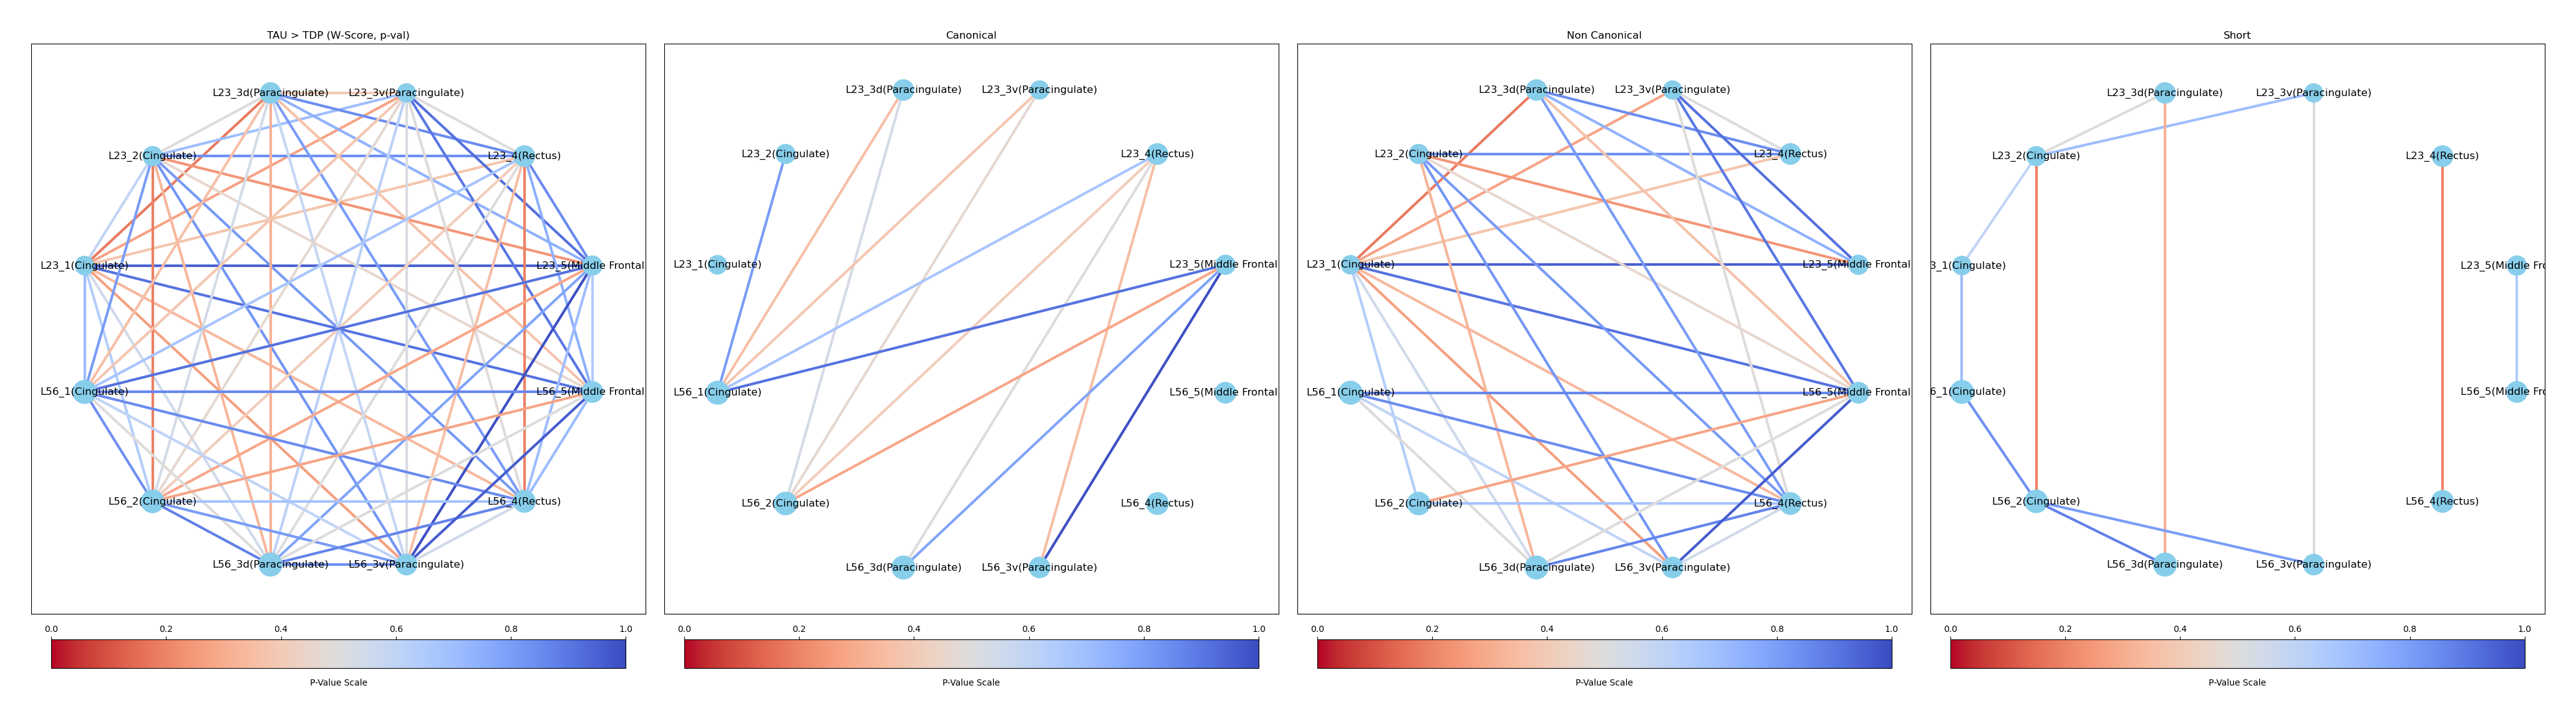

In [16]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TAU_gt_TDP_raw'], data_label, f'TAU > TDP ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_TDP_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_TDP_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_TDP_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTAU)

plt.savefig(layer_Fig + f'/SMI32_TAU > TDP ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()

## TDP > TAU

In [17]:
pd.DataFrame(cov_dict['TDP_gt_TAU_raw'], index=data_label, columns=data_label)

L23_1(Cingulate)  L23_2(Cingulate)  \
L23_1(Cingulate)                    NaN          0.400558   
L23_2(Cingulate)               0.400558               NaN   
L23_3d(Paracingulate)          0.822207          0.506045   
L23_3v(Paracingulate)          0.724176          0.300736   
L23_4(Rectus)                  0.621749          0.159763   
L23_5(Middle Frontal)          0.050015          0.761539   
L56_1(Cingulate)               0.295587          0.192666   
L56_2(Cingulate)               0.360218          0.807787   
L56_3d(Paracingulate)          0.450138          0.672201   
L56_3v(Paracingulate)          0.734215          0.179376   
L56_4(Rectus)                  0.664136          0.187669   
L56_5(Middle Frontal)          0.090773          0.542785   

                       L23_3d(Paracingulate)  L23_3v(Paracingulate)  \
L23_1(Cingulate)                    0.822207               0.724176   
L23_2(Cingulate)                    0.506045               0.300736   
L23_3d(Paracingulate)                    NaN               0.600346   
L23_3v(Paracingulate)               0.600346                    NaN   
L23_4(Rectus)                       0.153993               0.500268   
L23_5(Middle Frontal)               0.255585               0.085431   
L56_1(Cingulate)                    0.642628               0.614641   
L56_2(Cingulate)                    0.466143               0.533488   
L56_3d(Paracingulate)               0.687269               0.386628   
L56_3v(Paracingulate)               0.414550               0.486731   
L56_4(Rectus)                       0.195303               0.508767   
L56_5(Middle Frontal)               0.629637               0.101276   

                       L23_4(Rectus)  L23_5(Middle Frontal)  L56_1(Cingulate)  \
L23_1(Cingulate)            0.621749               0.050015          0.295587   
L23_2(Cingulate)            0.159763               0.761539          0.192666   
L23_3d(Paracingulate)       0.153993               0.255585          0.642628   
L23_3v(Paracingulate)       0.500268               0.085431          0.614641   
L23_4(Rectus)                    NaN               0.148528          0.324494   
L23_5(Middle Frontal)       0.148528                    NaN          0.088949   
L56_1(Cingulate)            0.324494               0.088949               NaN   
L56_2(Cingulate)            0.593628               0.717974          0.162399   
L56_3d(Paracingulate)       0.500180               0.216207          0.509093   
L56_3v(Paracingulate)       0.646859               0.008420          0.396681   
L56_4(Rectus)               0.808353               0.293054          0.152020   
L56_5(Middle Frontal)       0.250900               0.357930          0.138235   

                       L56_2(Cingulate)  L56_3d(Paracingulate)  \
L23_1(Cingulate)               0.360218               0.450138   
L23_2(Cingulate)               0.807787               0.672201   
L23_3d(Paracingulate)          0.466143               0.687269   
L23_3v(Paracingulate)          0.533488               0.386628   
L23_4(Rectus)                  0.593628               0.500180   
L23_5(Middle Frontal)          0.717974               0.216207   
L56_1(Cingulate)               0.162399               0.509093   
L56_2(Cingulate)                    NaN               0.121144   
L56_3d(Paracingulate)          0.121144                    NaN   
L56_3v(Paracingulate)          0.194812               0.153239   
L56_4(Rectus)                  0.321698               0.132769   
L56_5(Middle Frontal)          0.721285               0.503226   

                       L56_3v(Paracingulate)  L56_4(Rectus)  \
L23_1(Cingulate)                    0.734215       0.664136   
L23_2(Cingulate)                    0.179376       0.187669   
L23_3d(Paracingulate)               0.414550       0.195303   
L23_3v(Paracingulate)               0.486731       0.508767   
L23_4(Rectus)                       0.646859       0.808353   
L23_5(Middle F

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

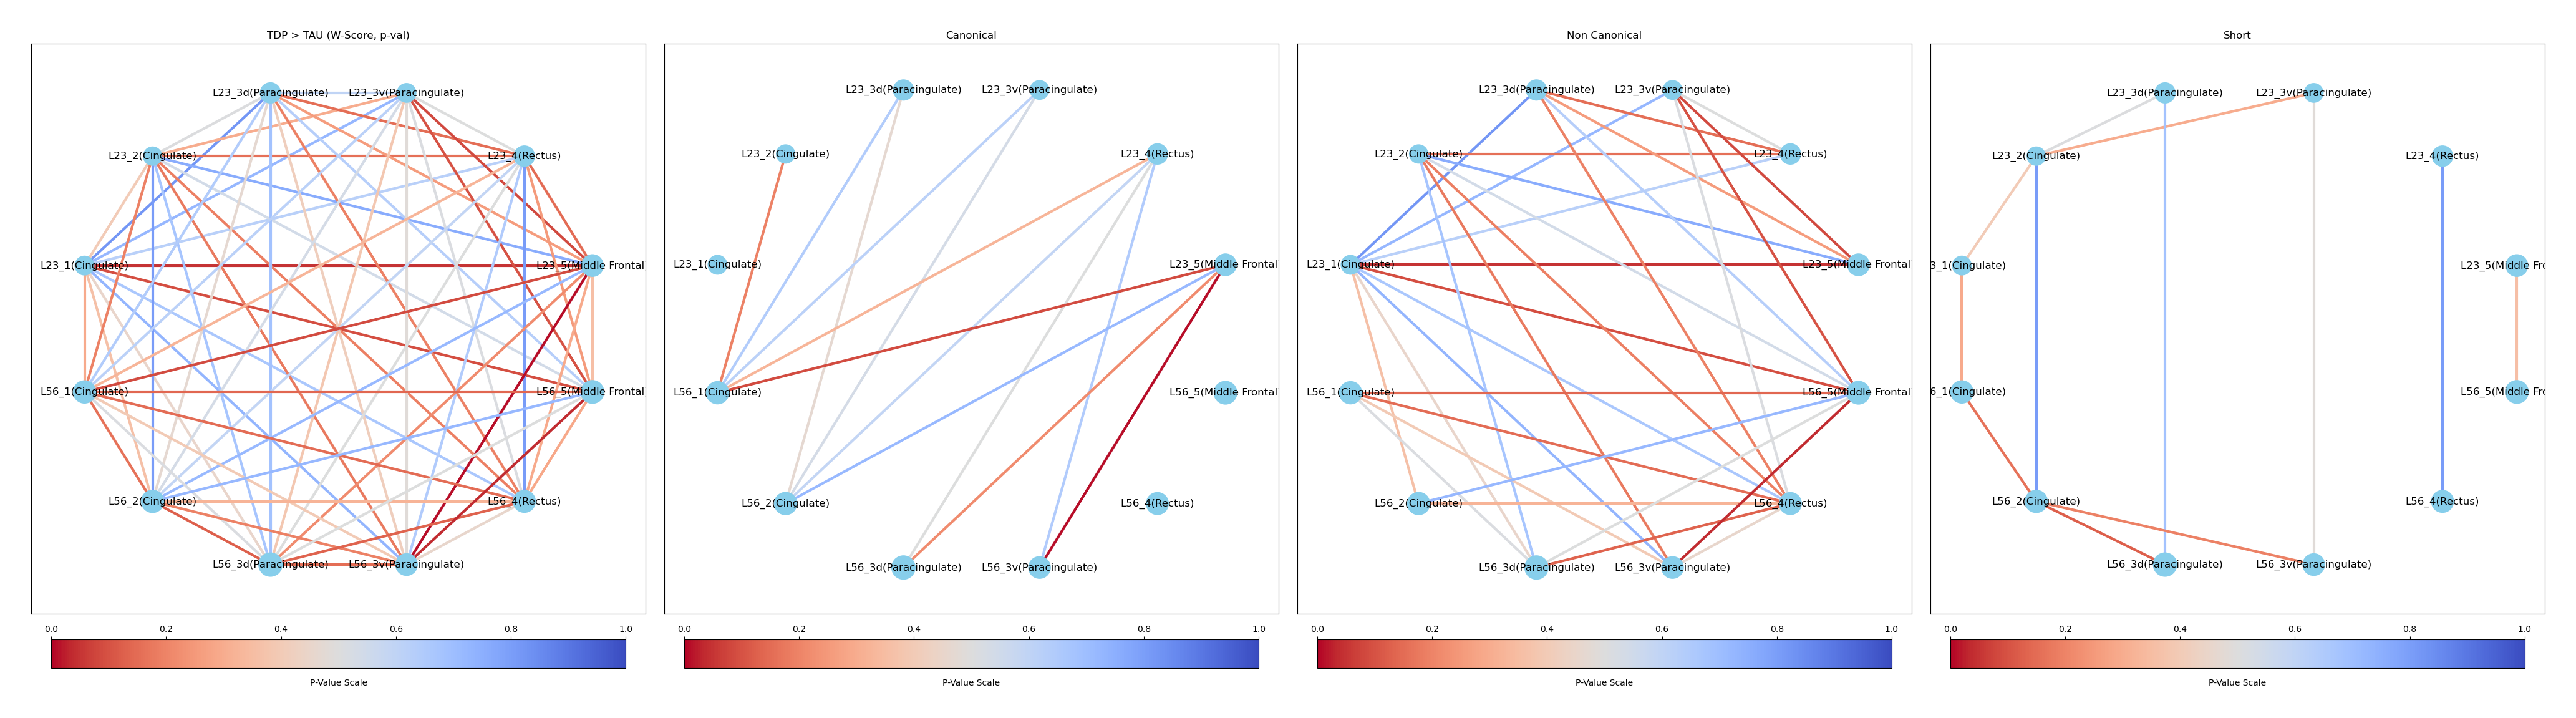

In [18]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TDP_gt_TAU_raw'], data_label, f'TDP > TAU ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_TAU_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_TAU_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_TAU_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTDP)

plt.savefig(layer_Fig + f'/SMI32_TDP > TAU ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()